In [184]:
import itertools
import numpy as np
import random as r
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

## Functions

In [185]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Loading Dataset

In [186]:
digits = datasets.load_digits()

## Preprocessing

In [187]:
#spliting the dataset in train and test
n_samples = len(digits.images)
digits.images = data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.3)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

#preprocessing data
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

## Training and Validating

In [189]:
TEST_ITER = 2

best_model = {'hls': 0, 
             'act': '',
             'lr': '',
             'accuracy': 0,
             'classifier': None}

for i in range(TEST_ITER):
    
    #choosing hyperparameters(hidden_layer_sizes, activation, learning_rate)
    hls = r.randint(100, 1000)
    act = r.choice(['identity', 'logistic', 'tanh', 'relu'])
    lr = r.choice(['constant', 'invscaling', 'adaptive'])
    
    #building the classifier
    classifier = MLPClassifier(hidden_layer_sizes=hls, 
                              activation=act, 
                              learning_rate=lr)
    
    #training the neural network
    classifier.fit(X_train, y_train)
    
    #validating
    y_pred = classifier.predict(X_validation)
    
    accuracy = accuracy_score(y_validation, y_pred)
    if accuracy > best_model['accuracy']:
        best_model['hls'] = hls 
        best_model['act'] = act
        best_model['lr'] = lr
        best_model['accuracy'] = accuracy
        best_model['classifier'] = classifier
    
    

print('best hyperparameters:'
      + '\n\thidden_layer_sizes = ' + str(best_model['hls'])
      + '\n\tactivation =  ' + best_model['act']
      + '\n\tlearning_rate = ' + best_model['lr'])

print('\naccuracy: ' + str(best_model['accuracy']))

best hyperparameters:
	hidden_layer_sizes = 442
	activation =  tanh
	learning_rate = adaptive

accuracy: 0.960317460317


## Testing

In [190]:
#predicting
classifier = best_model['classifier']
y_pred = classifier.predict(X_test)

## Metrics of the best model

### Confusion matrix

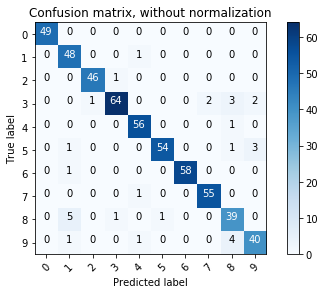

In [191]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = digits.target_names
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

### Accuracy

In [192]:
print('Accuracy score: %s ' % accuracy_score(y_test, y_pred))

Accuracy score: 0.942592592593 


### Macro-f1

In [193]:
target_names = ['class ' + str(name) for name in digits.target_names]
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00        49
    class 1       0.86      0.98      0.91        49
    class 2       0.98      0.98      0.98        47
    class 3       0.97      0.89      0.93        72
    class 4       0.95      0.98      0.97        57
    class 5       0.98      0.92      0.95        59
    class 6       1.00      0.98      0.99        59
    class 7       0.96      0.98      0.97        56
    class 8       0.81      0.85      0.83        46
    class 9       0.89      0.87      0.88        46

avg / total       0.94      0.94      0.94       540

